In [1]:
import pandas as pd
import ast
import itertools

In [2]:
df = pd.read_csv('many_products.csv')

In [3]:
df.columns

Index(['Name', 'Overall Function', 'Ingredients'], dtype='object')

In [4]:
df.iloc[200]

Name                Clarins My Clarins Pore-Less Blur And Matte Stick
Overall Function                                Viscosity controlling
Ingredients         ['Tocopherol', 'Arbutus Unedo Fruit Extract', ...
Name: 200, dtype: object

In [5]:
df['Ingredients'] = df['Ingredients'].apply(lambda x: ast.literal_eval(x))

In [6]:
# df['Ingredients'][0][0]

In [7]:
# Creating a set of all unique ingredients
all_ingredients = set(ingredient for sublist in df['Ingredients'] for ingredient in sublist)

all_ingredients

{'Ci 75120, Annatto',
 'Isopropylphthalimide',
 'C12-14 Pareth-7',
 'Peg-30 Dipolyhydroxystearate',
 'Sodium Hyaluronate',
 'Cocamidopropyl Betaine (Derived From Coconut Oil)',
 'Centella Asiatica Extract(1,000Ppm)',
 'Polyacrylamide',
 'Oleth-20',
 'Alpha-Isomethyl Ionone',
 'Schizophyllan',
 'Sodium Chloride (Derived From Salt)',
 'Ext. Violet 2',
 'Malus Sylvestris Flower Extract',
 'Titanium Dioxide (5.3%)',
 'Polysilicone-15',
 'Jojoba Oil PEG-150 Esters',
 'Blue 1 Lake',
 'Sodium Lauryl Sulfoacetate',
 'Algae (Seaweed) Extract',
 'C10-30 Cholesterol, Lanosterol Esters',
 'Aleurites Moluccanus Seed Oil',
 'Cetyl Alcohol (Vegetable Fatty Alcohol)',
 'Citrullus Vulgaris (Watermelon) Fruit Extract',
 'Arachidic Acid',
 'Isoamyl p-Methoxycinnamate',
 'Glycerin (Botanical Moisturizer)',
 'Phenylbenzimidazole Sulfonic Acid',
 'Cucumis Sativus (Cucumber) Fruit Extract(1,000 Ppm)',
 'Daucus Carota Sativa (Carrot) Extract',
 'PPG-38-Buteth-37',
 'Dehydroacetic Acid',
 'Trisodium Hedta',
 '

In [8]:
# https://skintypesolutions.com/blogs/skincare/antioxidant-ingredients-in-skincare
antioxidants_list = ['Arbutin', 'Kojic acid', 'Niacinamide','Alpha-Lipoic Acid', 'Artemisia Capillaris', 'Caffeine','Camellia Japonica Seed Oil',
                     'Coenzyme Q10 (Ubiquinone)', 'Coffea Arabica', 'Coffeeberry Extract', 'Crepidiastrum Denticulatum Extract', 'Curcumin', 'Genistein', 'Glutathione', 'Grape Seed Extract', 'Green Tea', 'Idebenone', 'Melatonin', 'Polyphenols', 'Polypodium Leucotomos', 'Pomegranate', 'Pycnogenol', 'Resveratrol', 'Saururus Chinensis', "Asian Lizard's Tail Plant", "Chinese Lizard's Tail", 'Silymarin', 'Ulmus Davidiana', 'Vaccinium myrtillus', 'Wild Bilberry', 'Vitamin C', 'Vitamin E']

SPF_list = 'Oxybenzone, Octinoxate, Cinoxate, Dioxybenzone, Ensulizole, Homosalate, Meradimate, Octisalate, Octocrylene, Padimate O, Sulisobenzone, Avobenzone'.split(', ')
SPF_list

['Oxybenzone',
 'Octinoxate',
 'Cinoxate',
 'Dioxybenzone',
 'Ensulizole',
 'Homosalate',
 'Meradimate',
 'Octisalate',
 'Octocrylene',
 'Padimate O',
 'Sulisobenzone',
 'Avobenzone']

In [9]:
ferulic_acid = []
acid = []
aha = []
bha = []
vitaminE = []
vitaminC = ['3-O-Ethyl-L-Ascorbic Acid', 'Ascorbic Acid']
ceramide = []
retinol = []
AHAs = ['Glycolic Acid', 'Citric Acid', 'Mandelic Acid', 'Malic Acid', 'Tartaric Acid', 'Lactic Acid']
BHAs = ['BHA', 'Salicylic Acid']
# peptide = []
for ingredient in all_ingredients:
    if 'Retinol' in ingredient:
        retinol.append(ingredient)
    if 'Ferulic Acid' in ingredient:
        ferulic_acid.append(ingredient)
    if 'Vitamin E' in ingredient:
        vitaminE.append(ingredient)
        
    if 'Vitamin C' in ingredient:
        vitaminC.append(ingredient)
    if 'Acid' in ingredient:
        for a in AHAs:
            if a in ingredient: 
                aha.append(ingredient)
        for b in BHAs:
            if b in ingredient:
                bha.append(ingredient)
        if ingredient not in aha and ingredient not in bha:
            acid.append(ingredient)
    if 'Ceramide' in ingredient: 
        ceramide.append(ingredient)
    # if 'Peptide' in ingredient:
    #     print('Peptide:', ingredient)
    

In [10]:
print(acid)
print(retinol)
print(ferulic_acid)
print(aha)
print(bha)
print(vitaminE)
print(vitaminC)
print(ceramide)

['Arachidic Acid', 'Phenylbenzimidazole Sulfonic Acid', 'Dehydroacetic Acid', 'Kojic Acid Dipalmitate', '3-Aminopropane Sulfonic Acid', 'Benzoic Acid Na', 'Tetrahydrojasmonic Acid', 'Ascorbic Acid 8.0%', 'Stearic Acid', 'Azelaic Acid 10.0%', 'Ascorbic Acid 10.5%', 'Dehydroacetic Acid (From Cane Sugar)', 'Laureth-11 Carboxylic Acid', 'Lactobionic Acid', 'Palmitic Acid', 'Benzoic Acid**', 'Ethyl Ascorbic Acid 15.0%', 'Benzoic Acid', 'Levulinic Acid', 'Dilinoleic Acid, Propanediol Copolymer', 'Lauric Acid', 'Phosphoric Acid', 'Hydroxyethylpiperazine Ethane Sulfonic Acid', 'Glucuronic Acid', 'Nordihydroguaiaretic Acid', 'Ascorbic Acid (Vitamin C)', 'L Ascorbic Acid', 'Stearic Acid (From Coconut Oil)', 'Tremella Fuciformis Extract (Silver Ear Extract With Effects Similar To Hyaluronic Acid)', 'Arginine (Amino Acid)', 'C12-20 Acid PEG- 8 Ester', 'Sorbic Acid (Fil D208580, 1)', 'Silk Amino Acids', 'Thiolactic Acid', 'Sorbic Acid', 'Ferulic Acid (0.1%)', '*Hyaluronic Acid', 'Formic Acid', 'Cap

# Predefine list of active ingredients

In [11]:
# Active ingredients:
actives = [
    "Hyaluronic Acid",
    "Sodium Hyaluronate",
    "Retinol",
    "Vitamin A",
    "Ascorbic Acid",
    'L-Ascorbic Acid',
    "Vitamin C",
    "Salicylic Acid",
    'Salicylic Acid (2%)', 'Salicylic Acid', 'Salicylic Acid (1.50%)', 'Capryloyl Salicylic Acid', 'Salicylic Acid (1.00%)',
    "Beta Hydroxy Acid (BHA)",
    "Niacinamide",
    "Vitamin B3",
    "Glycerin",
    "Glycerol",
    "Titanium Dioxide",
    "Zinc Oxide",
    "Lactic Acid",
    "AHA",
    "Citric Acid",
    "Glycolic Acid",
    "Mandelic Acid",
    'Lactic Acid'
    'Lactic Acid (3.7%)', 
    'Tartaric Acid',
    "Azelaic Acid",
    "Ferulic Acid",
    'Ferulic Acid (0.1%)', 
    "Benzoyl Peroxide",
    "Squalane",
    "Alpha Hydroxy Acids (AHAs)",
    "Beta Hydroxy Acids (BHAs)",
    "Ceramides",
    "Peptides",
    "Vitamin E",
    "Tocopherol",
    'Tocopheryl Acetate (Vitamin E)', 
    'Tocopherol (Vitamin E)',
    "Green Tea Extract",
    "Camellia Sinensis Leaf Extract",
    'Ceramide Eop', 'Ceramide NG', 'Ceramide 1', 'Ceramide AP', 'Ceramide Ng', 'Ceramide NP', 'Ceramide 2', 'Ceramide 3', 'Ceramide EOP', 'Ceramide 3,Ceramide 3,Ceramide 3', 'Ceramide 6 Ii', 'Ceramide Np', 'Ceramide 6 II', 'Ceramide Ap'
]

# AHAs = ['Glycolic Acid',
#         'Lactic Acid',
#         'Mandelic Acid',
#         'Citric Acid',
#         'Malic Acid',
#         'Tartaric Acid']

# BHAs = ['Salicylic Acid', 
#         'Betaine Salicylate',
#         'Willow Bark Extract']

# other_acids = ['Hyaluronic Acid',
#                'Azelaic Acid',
#                'Ferulic Acid',
#                'Kojic Acid',
#                'Ascorbic Acid',
#                'L-ascorbic Acid',
#                'Citric Acid',
#                'Mandelic Acid',
#                'Ellagic Acid',
#                'Linoleic Acid',
#                 'Oleic Acid',
#                 'Lipoic Acid',
#                 'Tranexamic Acid']



In [12]:
active_ingre_list = set(actives)

In [13]:
active_ingre_list

{'AHA',
 'Alpha Hydroxy Acids (AHAs)',
 'Ascorbic Acid',
 'Azelaic Acid',
 'Benzoyl Peroxide',
 'Beta Hydroxy Acid (BHA)',
 'Beta Hydroxy Acids (BHAs)',
 'Camellia Sinensis Leaf Extract',
 'Capryloyl Salicylic Acid',
 'Ceramide 1',
 'Ceramide 2',
 'Ceramide 3',
 'Ceramide 3,Ceramide 3,Ceramide 3',
 'Ceramide 6 II',
 'Ceramide 6 Ii',
 'Ceramide AP',
 'Ceramide Ap',
 'Ceramide EOP',
 'Ceramide Eop',
 'Ceramide NG',
 'Ceramide NP',
 'Ceramide Ng',
 'Ceramide Np',
 'Ceramides',
 'Citric Acid',
 'Ferulic Acid',
 'Ferulic Acid (0.1%)',
 'Glycerin',
 'Glycerol',
 'Glycolic Acid',
 'Green Tea Extract',
 'Hyaluronic Acid',
 'L-Ascorbic Acid',
 'Lactic Acid',
 'Lactic AcidLactic Acid (3.7%)',
 'Mandelic Acid',
 'Niacinamide',
 'Peptides',
 'Retinol',
 'Salicylic Acid',
 'Salicylic Acid (1.00%)',
 'Salicylic Acid (1.50%)',
 'Salicylic Acid (2%)',
 'Sodium Hyaluronate',
 'Squalane',
 'Tartaric Acid',
 'Titanium Dioxide',
 'Tocopherol',
 'Tocopherol (Vitamin E)',
 'Tocopheryl Acetate (Vitamin E)',


# Extract active ingredients from list of product ingredients  
→ get the list of active ingredients for each product  
- only active ingredients will be shown on the knowledge graph to present their interactions and prevent cluttering up the knowledge graph

In [14]:
df['Ingredients']

0       [Tocopherol, Panax Ginseng Root Extract, Rosma...
1       [Glycerin, Squalane, Urea, Pseudoalteromonas F...
2       [Salicylic Acid, 3-O-Ethyl Ascorbic Acid, Toco...
3       [Glycerin, Sodium Hyaluronate, Pseudoalteromon...
4       [Niacinamide, Caffeine, Tocopherol, Ascorbyl G...
                              ...                        
3951    [Tocopherol, Glycerin, Sodium Hyaluronate, Arg...
3952    [Tocopherol, Hydroxymethoxyphenyl Decanone, Is...
3953    [Salicylic Acid, 4-T-Butylcyclohexanol, Squala...
3954    [Ethylbisiminomethylguaiacol Manganese Chlorid...
3955    [Tocopheryl Acetate, Tocopherol, Camellia Sine...
Name: Ingredients, Length: 3956, dtype: object

In [15]:
def extract_active_ingredients(ingredient_list, active_list):
    return [ingredient for ingredient in ingredient_list if ingredient in active_list]

# Apply the function to the 'Ingredients' column to create a new 'Active Ingredients' column
df['Active Ingredients'] = df['Ingredients'].apply(lambda x: extract_active_ingredients(x, active_ingre_list))

In [29]:
product_id = 4
product_name = df['Name'][product_id]
print(len(df['Ingredients'][product_id]))
print("All Ingredients in:", product_name, ":", df['Ingredients'][product_id])
print("All Active Ingredients in:",product_name, ":", extract_active_ingredients(df['Ingredients'][product_id], active_ingre_list))

30
All Ingredients in: Kiehl’s Eye Fuel : ['Niacinamide', 'Caffeine', 'Tocopherol', 'Ascorbyl Glucoside', 'Adenosine', 'Palmitoyl Hexapeptide-12', 'Palmitoyl Tetrapeptide-7', 'Glycerin', 'Chlorphenesin', 'Chlorhexidine Digluconate', 'Hydroxyethylpiperazine Ethane Sulfonic Acid', 'Sodium Citrate', 'Disodium EDTA', 'Dimethicone', 'Ethylhexyl Palmitate', 'Caprylyl Glycol', 'Dimethicone, PEG-10, 15 Crosspolymer', 'PEG-10 Dimethicone', 'Steareth-20', 'Glycine Soja Protein', 'Phenoxyethanol', 'P-Anisic Acid', 'Potassium Sorbate', 'Ethylhexylglycerin', 'Sodium Benzoate', 'Aqua, Water', 'Dipropylene Glycol', 'Sodium Cocoyl Glutamate', 'Dimethicone, Vinyl Dimethicone Crosspolymer', 'Sodium Chloride']
All Active Ingredients in: Kiehl’s Eye Fuel : ['Niacinamide', 'Tocopherol', 'Glycerin']


4th product in df: Kiehl's Eye Fuel has 30 ingredients

In [30]:
# list all active ingredients of products which have active ingredients (should be all of the products)
df[df["Active Ingredients"].str.len() != 0]['Active Ingredients']

0       [Tocopherol, Capryloyl Salicylic Acid, Glyceri...
1                       [Glycerin, Squalane, Citric Acid]
2       [Salicylic Acid, Tocopherol, Glycerin, Citric ...
3             [Glycerin, Sodium Hyaluronate, Citric Acid]
4                     [Niacinamide, Tocopherol, Glycerin]
                              ...                        
3950                            [Niacinamide, Tocopherol]
3951    [Tocopherol, Glycerin, Sodium Hyaluronate, Cit...
3952    [Tocopherol, Glycerin, Sodium Hyaluronate, Cit...
3953                 [Salicylic Acid, Squalane, Glycerin]
3955    [Tocopherol, Glycerin, Sodium Hyaluronate, Cit...
Name: Active Ingredients, Length: 3514, dtype: object

In [31]:
df.columns

Index(['Name', 'Overall Function', 'Ingredients', 'Active Ingredients'], dtype='object')

# Rules

Disclaimer: The following list of predefined interaction effects (beneficial or adverse) were sourced from various online resources and have not been verified by dermatologists/pharamcists/any skincare experts.

In [32]:
predefined_rules = ['Avoid Retinol and Vitamin C: cancel out effects',
                    'Hyaluronic Acid and Polyglutamic Acid: better hydration',
                    'Antioxidant and SPF: better UV protection',
                    'Retinol and Niacinamide: improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone',
                    'Retinol and Peptides: produce collagen and hyaluronic acid in the skin, and can help reduce inflammation and increase cell turnover rate',
                    'Avoid Retinol and AHA: cancel out effects, cause irritation', 
                    'Avoid Retinol and BHA: may cause breakouts, dry skin, irritation',
                    'Avoid Retinol and Citric Acid: excessive dryness, redness, sensitivity, or a rash',
                    'Avoid AHA/BHA and Niacinamide: redness',
                    'Avoid Retinol and Benzoyl Peroxide: too harsh for skin.',
                    'Avoid AHA and Vitamin C: irritation',
                    'Avoid BHA and Vitamin C: irritation',
                    'Vitamin C and Vitamin E: can help prevent photodamage',
                    'Vitamin C and Ferulic Acid: Ferulic acid, used to fend off free radicals, helps to stabilize vitamin C',
                    'Avoid Salicylic acid and Benzoyl Peroxide: skin irritation',
                    'Avoid Benzoyl Peroxide and Retinol: cancel out effects']



In [33]:
new_rules = []
for rule in predefined_rules:
    if 'Retinol' in rule:
        for name in retinol:
        # if name!='Retinol': # get only alternative names to make the new rule
            new_rules.append(rule.replace('Retinol', name))
    if 'Ferulic Acid' in rule:
        for name in ferulic_acid:
            # if name!= 'Ferulic Acid':
            new_rules.append(rule.replace('Ferulic Acid', name))
    if 'Vitamin E' in rule:
        for name in vitaminE:
            # if name != 'Vitamin E':
            new_rules.append(rule.replace('Vitamin E', name))
    if 'Vitamin C' in rule:
        for name in vitaminC:
            new_rules.append(rule.replace('Vitamin C', name))
    if 'AHA' in rule:
        for name in aha:
            new_rules.append(rule.replace('AHA', name))
    if 'BHA' in rule:
        for name in bha:
            new_rules.append(rule.replace('BHA', name))
    if 'Antioxidant' in rule:
        for name in antioxidants_list:
            new_rules.append(rule.replace('Antioxidant', name))
    if 'SPF' in rule:
        for name in SPF_list:
            new_rules.append(rule.replace('SPF', name))
        

In [34]:
new_rules

['Avoid Retinol 0.5% and Vitamin C: cancel out effects',
 'Avoid Retinol and Vitamin C: cancel out effects',
 'Avoid Retinol 1.0% and Vitamin C: cancel out effects',
 'Avoid Retinol 0.2% and Vitamin C: cancel out effects',
 'Avoid Retinol and 3-O-Ethyl-L-Ascorbic Acid: cancel out effects',
 'Avoid Retinol and Ascorbic Acid: cancel out effects',
 'Avoid Retinol and Ascorbic Acid (Vitamin C): cancel out effects',
 'Avoid Retinol and Tetrahexyldecyl Ascorbate (Vitamin C): cancel out effects',
 'Avoid Retinol and Vitamin C: cancel out effects',
 'Avoid Retinol and Sodium Ascorbyl Phosphate (Vitamin C): cancel out effects',
 'Avoid Retinol and Ascorbyl Palmitate (Vitamin C Liposome): cancel out effects',
 'Avoid Retinol and Ethyl Ascorbic Acid (Vitamin C): cancel out effects',
 'Avoid Retinol and Magnesium Ascorbyl Phosphate (Vitamin C): cancel out effects',
 'Arbutin and SPF: better UV protection',
 'Kojic acid and SPF: better UV protection',
 'Niacinamide and SPF: better UV protection',
 

In [35]:
all_rules = new_rules

Processing rules
- split the rules into beneficial or adverse effects (adverse effect rules are signaled by prefix 'Avoid: ')
- create a dictionary with keys (ingred1, ingred2), values would be the effect of using both ingredients together

In [36]:
beneficial_combis = {}
adverse_combis = {}
for rule in all_rules:
    if rule.startswith('Avoid '):
        rule = rule.removeprefix('Avoid ')
        # print(rule)
        ingreds, effect_ = rule.split(": ")
        ingred_1, ingred_2 = ingreds.split(" and ")
        adverse_combis[(ingred_1, ingred_2)] = effect_
    else:
        ingreds, effect_ = rule.split(": ")
        ingred_1, ingred_2 = ingreds.split(" and ")
        beneficial_combis[(ingred_1, ingred_2)] = effect_


In [37]:
beneficial_combis


{('Arbutin', 'SPF'): 'better UV protection',
 ('Kojic acid', 'SPF'): 'better UV protection',
 ('Niacinamide', 'SPF'): 'better UV protection',
 ('Alpha-Lipoic Acid', 'SPF'): 'better UV protection',
 ('Artemisia Capillaris', 'SPF'): 'better UV protection',
 ('Caffeine', 'SPF'): 'better UV protection',
 ('Camellia Japonica Seed Oil', 'SPF'): 'better UV protection',
 ('Coenzyme Q10 (Ubiquinone)', 'SPF'): 'better UV protection',
 ('Coffea Arabica', 'SPF'): 'better UV protection',
 ('Coffeeberry Extract', 'SPF'): 'better UV protection',
 ('Crepidiastrum Denticulatum Extract', 'SPF'): 'better UV protection',
 ('Curcumin', 'SPF'): 'better UV protection',
 ('Genistein', 'SPF'): 'better UV protection',
 ('Glutathione', 'SPF'): 'better UV protection',
 ('Grape Seed Extract', 'SPF'): 'better UV protection',
 ('Green Tea', 'SPF'): 'better UV protection',
 ('Idebenone', 'SPF'): 'better UV protection',
 ('Melatonin', 'SPF'): 'better UV protection',
 ('Polyphenols', 'SPF'): 'better UV protection',
 ('

In [38]:
adverse_combis 

{('Retinol 0.5%', 'Vitamin C'): 'cancel out effects',
 ('Retinol', 'Vitamin C'): 'cancel out effects',
 ('Retinol 1.0%', 'Vitamin C'): 'cancel out effects',
 ('Retinol 0.2%', 'Vitamin C'): 'cancel out effects',
 ('Retinol', '3-O-Ethyl-L-Ascorbic Acid'): 'cancel out effects',
 ('Retinol', 'Ascorbic Acid'): 'cancel out effects',
 ('Retinol', 'Ascorbic Acid (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Tetrahexyldecyl Ascorbate (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Sodium Ascorbyl Phosphate (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Ascorbyl Palmitate (Vitamin C Liposome)'): 'cancel out effects',
 ('Retinol', 'Ethyl Ascorbic Acid (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Magnesium Ascorbyl Phosphate (Vitamin C)'): 'cancel out effects',
 ('Retinol 0.5%', 'AHA'): 'cancel out effects, cause irritation',
 ('Retinol', 'AHA'): 'cancel out effects, cause irritation',
 ('Retinol 1.0%', 'AHA'): 'cancel out effects, cause irritation',
 ('Retinol 0.2%', 'AHA'): 'ca

In [39]:
all_combis = beneficial_combis | adverse_combis

In [91]:
# # TESTING only: to check if predefined rules logic is implemented without errors
# # CHECKED: ALL GOOD 
# df = pd.concat([df, pd.DataFrame([{'Name': 'test_product1','Overall Function': '', 'Ingredients': ['Retinol', 'Antioxidants'],'Active Ingredients': ['Retinol', 'Antioxidants']}])], ignore_index=True)
   
# df = pd.concat([df, pd.DataFrame([{'Name': 'test_product2',
#           'Overall Function': '',
#           'Ingredients': ['Benzoyl Peroxide', 'SPF'],
#           'Active Ingredients': ['Benzoyl Peroxide', 'SPF']}])], ignore_index=True)       
          

In [41]:
df.tail()

Name  \
3951     The Ordinary Natural Moisturizing Factors + Ha   
3952  The Ordinary Natural Moisturizing Factors + Ph...   
3953    The Ordinary Salicylic Acid 2% Masque - Scented   
3954                          The Ordinary Euk 134 0.1%   
3955  RITUALS The Ritual Of Karma After Sun Hydratin...   

               Overall Function  \
3951  Skin-identical ingredient   
3952      Moisturizer/humectant   
3953      Viscosity controlling   
3954                Antioxidant   
3955                  Emollient   

                                            Ingredients  \
3951  [Tocopherol, Glycerin, Sodium Hyaluronate, Arg...   
3952  [Tocopherol, Hydroxymethoxyphenyl Decanone, Is...   
3953  [Salicylic Acid, 4-T-Butylcyclohexanol, Squala...   
3954  [Ethylbisiminomethylguaiacol Manganese Chlorid...   
3955  [Tocopheryl Acetate, Tocopherol, Camellia Sine...   

                                     Active Ingredients  
3951  [Tocopherol, Glycerin, Sodium Hyaluronate, Cit...  
3952  [Tocopherol, Glycerin, Sodium Hyaluronate, Cit...  
3953               [Salicylic Acid, Squalane, Glycerin]  
3954                                                 []  
3955  [Tocopherol, Glycerin, Sodium Hyaluronate, Cit...

In [42]:
all_combis

{('Arbutin', 'SPF'): 'better UV protection',
 ('Kojic acid', 'SPF'): 'better UV protection',
 ('Niacinamide', 'SPF'): 'better UV protection',
 ('Alpha-Lipoic Acid', 'SPF'): 'better UV protection',
 ('Artemisia Capillaris', 'SPF'): 'better UV protection',
 ('Caffeine', 'SPF'): 'better UV protection',
 ('Camellia Japonica Seed Oil', 'SPF'): 'better UV protection',
 ('Coenzyme Q10 (Ubiquinone)', 'SPF'): 'better UV protection',
 ('Coffea Arabica', 'SPF'): 'better UV protection',
 ('Coffeeberry Extract', 'SPF'): 'better UV protection',
 ('Crepidiastrum Denticulatum Extract', 'SPF'): 'better UV protection',
 ('Curcumin', 'SPF'): 'better UV protection',
 ('Genistein', 'SPF'): 'better UV protection',
 ('Glutathione', 'SPF'): 'better UV protection',
 ('Grape Seed Extract', 'SPF'): 'better UV protection',
 ('Green Tea', 'SPF'): 'better UV protection',
 ('Idebenone', 'SPF'): 'better UV protection',
 ('Melatonin', 'SPF'): 'better UV protection',
 ('Polyphenols', 'SPF'): 'better UV protection',
 ('

In [43]:
# Filter the combinations
filtered_beneficial_combis = {k: v for k, v in beneficial_combis.items() if k[0] in all_ingredients and k[1] in all_ingredients}
filtered_adverse_combis = {k: v for k, v in adverse_combis.items() if k[0] in all_ingredients and k[1] in all_ingredients}


In [111]:
set(filtered_beneficial_combis.values())

{'Ferulic acid, used to fend off free radicals, helps to stabilize vitamin C',
 'can help prevent photodamage',
 'improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone'}

In [45]:
filtered_adverse_combis

{('Retinol 0.5%', 'Vitamin C'): 'cancel out effects',
 ('Retinol', 'Vitamin C'): 'cancel out effects',
 ('Retinol 1.0%', 'Vitamin C'): 'cancel out effects',
 ('Retinol 0.2%', 'Vitamin C'): 'cancel out effects',
 ('Retinol', 'Ascorbic Acid'): 'cancel out effects',
 ('Retinol', 'Ascorbic Acid (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Tetrahexyldecyl Ascorbate (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Sodium Ascorbyl Phosphate (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Ascorbyl Palmitate (Vitamin C Liposome)'): 'cancel out effects',
 ('Retinol', 'Ethyl Ascorbic Acid (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Magnesium Ascorbyl Phosphate (Vitamin C)'): 'cancel out effects',
 ('Retinol', 'Glycolic Acid 10.0%'): 'cancel out effects, cause irritation',
 ('Retinol',
  'Lactobacillus Ferment (Skin-Nurturing Substance From Lactic Acid Bacteria)'): 'cancel out effects, cause irritation',
 ('Retinol', 'Lactic Acid'): 'cancel out effects, cause irritation',
 ('Reti

In [46]:
filtered_all_combis = filtered_beneficial_combis | filtered_adverse_combis
filtered_all_combis

{('Retinol 0.5%',
  'Niacinamide'): 'improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone',
 ('Retinol',
  'Niacinamide'): 'improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone',
 ('Retinol 1.0%',
  'Niacinamide'): 'improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone',
 ('Retinol 0.2%',
  'Niacinamide'): 'improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone',
 ('Vitamin C', 'Vitamin E (Tocopherol)'): 'can help prevent photodamage',
 ('Vitamin C',
  'Tocopheryl Acetate (Vitamin E'): 'can help prevent photodamage',
 ('Vitamin C',
  'Tocopherol Acetate (Vitamin E)'): 'can help prevent photodamage',
 ('Vitamin C',
  'Tocopherol (Vitamin E, Sunflower Derived, Dérivé De Tournesol)'): 'can help prevent photodamage',
 ('Vitamin C', 'Tocopherol (Vitamin E)'): 'can help prev

In [47]:
# Function to find pairwise effects based on the all_combis dictionary
def find_pairwise_effects(ingredients1, ingredients2, combis):
    effects = []
    for ing1 in ingredients1:
        for ing2 in ingredients2:
            if (ing1, ing2) in combis:
                effects.append(combis[(ing1, ing2)])
            elif (ing2, ing1) in combis:
                effects.append(combis[(ing2, ing1)])
    return effects



In [48]:
df.columns

Index(['Name', 'Overall Function', 'Ingredients', 'Active Ingredients'], dtype='object')

In [105]:
# List to store the results
pairwise_effects = []
pos_pairwise_effects = []
neg_pairwise_effects = []

# Iterate through all pairs of products
for (idx1, row1), (idx2, row2) in itertools.combinations(df.iterrows(), 2):
    # if 'Vitamin C' in row1['Name'] and 'Retinol' in row2['Name']:
        # print("r1:", row1['Name'],":","r2:",row2['Name'])
        # print("1a", row1['Active Ingredients'])
        # print("2a", row2['Active Ingredients'])
        # break
    pos_effects = find_pairwise_effects(row1['Active Ingredients'], row2['Active Ingredients'], beneficial_combis)
    neg_effects = find_pairwise_effects(row1['Active Ingredients'], row2['Active Ingredients'], adverse_combis)
    effects = find_pairwise_effects(row1['Active Ingredients'], row2['Active Ingredients'], all_combis)
    if effects:
        pairwise_effects.append({'Pair': (row1['Name'], row2['Name']), 'All Effects': effects})
    if neg_effects:
        neg_pairwise_effects.append({'Pair': (row1['Name'], row2['Name']), 'Negative Effects': neg_effects})
    if pos_effects: 
        pos_pairwise_effects.append({'Pair': (row1['Name'], row2['Name']), 'Positive Effects': pos_effects})

In [106]:
# Displaying the results
pairwise_effects


[{'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Kiehl’s Micro Dose Retinol'),
  'All Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Kiehl’s Retinol Fast-release Wrinkle Reducing Night Serum'),
  'All Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Sulwhasoo Concentrated Ginseng Renewing Cream Ex'),
  'All Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Sulwhasoo Concentrated Ginseng Renewing Serum Ex'),
  'All Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Sulwhasoo Ginseng Renewing Cream

In [107]:
neg_pairwise_effects

[{'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Kiehl’s Micro Dose Retinol'),
  'Negative Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Kiehl’s Retinol Fast-release Wrinkle Reducing Night Serum'),
  'Negative Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Sulwhasoo Concentrated Ginseng Renewing Cream Ex'),
  'Negative Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Sulwhasoo Concentrated Ginseng Renewing Serum Ex'),
  'Negative Effects': ['may cause breakouts, dry skin, irritation',
   'excessive dryness, redness, sensitivity, or a rash']},
 {'Pair': ('Kiehl’s Vital Skin Strengthening Serum',
   'Sulwhasoo Gi

In [108]:
pos_pairwise_effects[11]

{'Pair': ('Kiehl’s Eye Fuel', 'Clinique Fresh Pressed Overnight Booster'),
 'Positive Effects': ['improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone']}

In [109]:
# Check if all values are the same
# Extracting all values from all dictionaries and checking if they are the same
# Extracting all values from the 'Positive Effects' key and checking if they are the same
all_pos_effects = set([value for d in pos_pairwise_effects for value in d['Positive Effects']])
are_all_values_same = len(all_pos_effects) == 1

# are_all_values_same
all_pos_effects

{'Ferulic acid, used to fend off free radicals, helps to stabilize vitamin C',
 'can help prevent photodamage',
 'improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone'}

In [89]:
all_neg_effects= set([value for d in neg_pairwise_effects for value in d['Negative Effects']])
are_all_values_same = len(all_neg_effects) == 1

# are_all_values_same
all_neg_effects

False

In [90]:
all_effects = set([value for d in pairwise_effects for value in d['All Effects']])
are_all_values_same = len(all_effects) == 1

# are_all_values_same
all_effects

False



Miscellaneous information:
    
- Niacinamide: Team water
- L-ascorbic acid: Team water
- AHA: Team water (sometimes both)
- BHA: salicylic acid sorta bats for both teams
- Retinol: Team oil
- Vitamin E: Team oil
- Ceramides: Team oil





## Create Knowledge Graph
open this link: http://127.0.0.1:8050/

In [57]:
all_active_ingred = set(ingredient for sublist in df['Active Ingredients'] for ingredient in sublist)

In [60]:
import dash
import dash_cytoscape as cyto
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import networkx as nx
from dash import dcc

- Can take 2 product inputs selected from dropdown lists
- Product and Ingredient nodes shown with names; all coloured grey; 
- No interaction effects text displayed

In [63]:
def generate_elements(product_names):
    G = nx.Graph()
    all_ingredients = set()
    for product_name in product_names:
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            all_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, color='black')

    # Check for interactions between ingredients of the two products
    for ing1 in all_ingredients:
        for ing2 in all_ingredients:
            if ing1 != ing2:
                if (ing1, ing2) in filtered_beneficial_combis:
                    G.add_edge(ing1, ing2, label=filtered_beneficial_combis[(ing1, ing2)], color='green')
                elif (ing1, ing2) in filtered_adverse_combis:
                    G.add_edge(ing1, ing2, label=filtered_adverse_combis[(ing1, ing2)], color='red')

    # Add overall product effects
    for product_pair, effect in filtered_all_combis.items():
        if product_pair[0] in product_names and product_pair[1] in product_names:
            G.add_edge(product_pair[0], product_pair[1], label=effect, color='yellow')

    elements = [{'data': {'id': node, 'label': node}, 'classes': 'blue' if G.nodes[node].get('type') == 'product' else 'orange'} for node in G.nodes]
    elements += [{'data': {'source': edge[0], 'target': edge[1], 'label': G.edges[edge].get('label', '')}, 'classes': G.edges[edge].get('color', 'black')} for edge in G.edges]
    return elements

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown-1',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product A'
    ),
    dcc.Dropdown(
        id='product-dropdown-2',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product B'
    ),
    cyto.Cytoscape(
        id='cytoscape',
        elements=generate_elements(['Product A', 'Product B']),
        style={'width': '100%', 'height': '500px'},
        layout={'name': 'breadthfirst'}
    )
])

@app.callback(
    Output('cytoscape', 'elements'),
    [Input('product-dropdown-1', 'value'), Input('product-dropdown-2', 'value')]
)
def update_graph(selected_product_1, selected_product_2):
    return generate_elements([selected_product_1, selected_product_2])

if __name__ == '__main__':
    app.run_server(debug=True)

- Can take 2 product inputs selected from dropdown lists
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Interaction effects text displayed all in NAVY
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges displayed

In [64]:
def generate_elements(product_names):
    G = nx.Graph()
    all_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product', color='blue')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            all_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient', color='orange')
                G.add_edge(product_name, ingredient, color='black')

    for ing1 in all_ingredients:
        for ing2 in all_ingredients:
            if ing1 != ing2:
                if (ing1, ing2) in beneficial_combis:
                    G.add_edge(ing1, ing2, label=beneficial_combis[(ing1, ing2)], color='green')
                elif (ing1, ing2) in adverse_combis:
                    G.add_edge(ing1, ing2, label=adverse_combis[(ing1, ing2)], color='red')

    elements = []
    for node, data in G.nodes(data=True):
        elements.append({
            'data': {'id': node, 'label': node},
            'classes': data['color']
        })

    for source, target, data in G.edges(data=True):
        elements.append({
            'data': {
                'source': source,
                'target': target,
                'label': data.get('label', '')
            },
            'classes': data['color']
        })

    return elements

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown-1',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product A'
    ),
    dcc.Dropdown(
        id='product-dropdown-2',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product B'
    ),
    cyto.Cytoscape(
        id='cytoscape',
        elements=generate_elements(['Product A', 'Product B']),
        style={'width': '100%', 'height': '500px'},
        layout={'name': 'breadthfirst'},
        stylesheet=[
            {'selector': '.blue', 'style': {'background-color': 'blue', 'line-color': 'blue'}},
            {'selector': '.orange', 'style': {'background-color': 'orange', 'line-color': 'orange'}},
            {'selector': '.green', 'style': {'line-color': 'green'}},
            {'selector': '.red', 'style': {'line-color': 'red'}},
            {'selector': '.black', 'style': {'line-color': 'black'}},
            {'selector': 'edge', 'style': {'label': 'data(label)', 'color': 'navy'}}
        ]
    )
])

@app.callback(
    Output('cytoscape', 'elements'),
    [Input('product-dropdown-1', 'value'), Input('product-dropdown-2', 'value')]
)
def update_graph(selected_product_1, selected_product_2):
    return generate_elements([selected_product_1, selected_product_2])

if __name__ == '__main__':
    app.run_server(debug=True)

- Can take 2 product inputs selected from dropdown lists
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges displayed

In [66]:
def generate_elements(product_names):
    G = nx.Graph()

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)

    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({
            'data': {'id': node, 'label': node},
            'classes': node_class
        })

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({
            'data': {'source': source, 'target': target, 'label': data.get('label', '')},
            'classes': edge_class
        })

    return elements

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown-1',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product A'
    ),
    dcc.Dropdown(
        id='product-dropdown-2',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product B'
    ),
    cyto.Cytoscape(
        id='cytoscape',
        elements=generate_elements(['Product A', 'Product B']),
        style={'width': '100%', 'height': '500px'},
        layout={'name': 'breadthfirst'},
        stylesheet=[
            {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
            {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
            {'selector': '.contains', 'style': {'line-color': 'black'}},
            {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
            {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}}
        ]
    )
])

@app.callback(
    Output('cytoscape', 'elements'),
    [Input('product-dropdown-1', 'value'), Input('product-dropdown-2', 'value')]
)
def update_graph(selected_product_1, selected_product_2):
    return generate_elements([selected_product_1, selected_product_2])

if __name__ == '__main__':
    app.run_server(debug=True)

- Can take 2 product inputs selected from dropdown lists
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
- Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 


In [67]:
# Can take 2 product inputs selected from dropdown lists
# Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
# Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
# Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
# Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 

def generate_elements(product_names):
    G = nx.Graph()

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    combined_effects = []
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)
                combined_effects.append(f"{relation.capitalize()} Effect: {label}")

    # Add edge between products with combined effects
    if len(product_names) == 2:
        G.add_edge(product_names[0], product_names[1], label='; '.join(combined_effects), relation='product_interaction')

    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({'data': {'id': node, 'label': node}, 'classes': node_class})

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({'data': {'source': source, 'target': target, 'label': data.get('label', '')}, 'classes': edge_class})

    return elements

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown-1',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product A'
    ),
    dcc.Dropdown(
        id='product-dropdown-2',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product B'
    ),
    cyto.Cytoscape(
        id='cytoscape',
        elements=generate_elements(['Product A', 'Product B']),
        style={'width': '100%', 'height': '500px'},
        layout={'name': 'breadthfirst'},
        stylesheet=[
            {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
            {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
            {'selector': '.contains', 'style': {'line-color': 'black'}},
            {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
            {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}},
            {'selector': '.product_interaction', 'style': {'line-color': 'navy', 'color': 'navy', 'label': 'data(label)'}}
        ]
    )
])

@app.callback(
    Output('cytoscape', 'elements'),
    [Input('product-dropdown-1', 'value'), Input('product-dropdown-2', 'value')]
)
def update_graph(selected_product_1, selected_product_2):
    return generate_elements([selected_product_1, selected_product_2])

if __name__ == '__main__':
    app.run_server(debug=True)

- Can take 2 product inputs selected from dropdown lists
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
- Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
  - with grey box outline around the text


In [68]:
# Can take 2 product inputs selected from dropdown lists
# Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
# Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
# Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
# Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
#  --> with grey box outline around the text

def generate_elements(product_names):
    G = nx.Graph()

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    combined_effects = []
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)
                combined_effects.append(f"{relation.capitalize()} Effect: {label}")

    # Add edge between products with combined effects
    if len(product_names) == 2:
        G.add_edge(product_names[0], product_names[1], label='; '.join(combined_effects), relation='product_interaction')


    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({'data': {'id': node, 'label': node}, 'classes': node_class})

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({'data': {'source': source, 'target': target, 'label': data.get('label', '')}, 'classes': edge_class})

    return elements

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown-1',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product A'
    ),
    dcc.Dropdown(
        id='product-dropdown-2',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product B'
    ),
    cyto.Cytoscape(
        id='cytoscape',
        elements=generate_elements(['Product A', 'Product B']),
        style={'width': '100%', 'height': '500px'},
        layout={'name': 'breadthfirst'},
        stylesheet=[
            {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
            {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
            {'selector': '.contains', 'style': {'line-color': 'black'}},
            {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
            {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}},
            {'selector': '.product_interaction', 'style': {'line-color': 'navy', 'color': 'navy', 'label': 'data(label)'}},
            {'selector': '.product_interaction',
                'style': {
                    'line-color': 'navy',
                    'color': 'navy',
                    'label': 'data(label)',
                    'text-background-color': 'white',
                    'text-background-opacity': 1,
                    'text-background-padding': 5,
                    'text-border-color': 'black',
                    'text-border-opacity': 1,
                    'text-border-width': 1
                }
            }
        ]
    )
])

@app.callback(
    Output('cytoscape', 'elements'),
    [Input('product-dropdown-1', 'value'), Input('product-dropdown-2', 'value')]
)
def update_graph(selected_product_1, selected_product_2):
    return generate_elements([selected_product_1, selected_product_2])

if __name__ == '__main__':
    app.run_server(debug=True)


- Can take 2 product inputs selected from dropdown lists
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
- Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
    - with grey box outline around the text
- Text Box at the side which also shows Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS
(Text Box for easier reading in case the knowledge graph is too messy)

In [69]:
def generate_elements(product_names):
    G = nx.Graph()

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    combined_effects = []
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)
                combined_effects.append(f"{relation.capitalize()} Effect: {label}")

    # Add edge between products with combined effects
    if len(product_names) == 2:
        G.add_edge(product_names[0], product_names[1], label='; '.join(combined_effects), relation='product_interaction')


    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({'data': {'id': node, 'label': node}, 'classes': node_class})

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({'data': {'source': source, 'target': target, 'label': data.get('label', '')}, 'classes': edge_class})

    return elements, '; '.join(combined_effects)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown-1',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product A'
    ),
    dcc.Dropdown(
        id='product-dropdown-2',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value='Product B'
    ),
    html.Div([
        cyto.Cytoscape(
            id='cytoscape',
            elements=generate_elements(['Product A', 'Product B'])[0],
            style={'width': '80%', 'height': '500px', 'display': 'inline-block'},
            layout={'name': 'breadthfirst'},
            stylesheet=[
            {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
            {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
            {'selector': '.contains', 'style': {'line-color': 'black'}},
            {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
            {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}},
            {'selector': '.product_interaction', 'style': {'line-color': 'navy', 'color': 'navy', 'label': 'data(label)'}},
            {'selector': '.product_interaction',
                'style': {
                    'line-color': 'navy',
                    'color': 'navy',
                    'label': 'data(label)',
                    'text-background-color': 'white',
                    'text-background-opacity': 1,
                    'text-background-padding': 5,
                    'text-border-color': 'black',
                    'text-border-opacity': 1,
                    'text-border-width': 1
                }
            }
        ]
        ),
        html.Div(
            id='effect-box',
            style={'width': '20%', 'height': '500px', 'display': 'inline-block', 'vertical-align': 'top', 'border': '1px solid black', 'padding': '10px', 'overflow-y': 'scroll'}
        )
    ], style={'display': 'flex'})
])

@app.callback(
    [Output('cytoscape', 'elements'), Output('effect-box', 'children')],
    [Input('product-dropdown-1', 'value'), Input('product-dropdown-2', 'value')]
)
def update_graph(selected_product_1, selected_product_2):
    elements, combined_effects = generate_elements([selected_product_1, selected_product_2])
    combined_effects_text = ""
    if 'Beneficial Effect' and 'Adverse Effect' in combined_effects:
        text = combined_effects
        word_to_split_before = "Beneficial"

        # Split the text at the word_to_split_before
        parts = text.split(word_to_split_before)

        # Check if the word_to_split_before exists in the text
        if len(parts) == 2:
            first_half = parts[0]  # First part of the string
            second_half = word_to_split_before + parts[1]  # Second part of the string starting with the word
            combined_effects_text = first_half + '\n' + second_half # Join effects with HTML line break
            print(combined_effects_text)
            # print("First half:", first_half)
            # print("Second half:", second_half)
        # else:
        #     # print("The word to split before was not found in the text.")
    else:
        combined_effects_text = combined_effects
    return elements, f"Combined Effects: {combined_effects_text}"


if __name__ == '__main__':
    app.run_server(debug=True)



Beneficial Effect: improve the appearance of skin blemishes, help diminish the appearance of ageing, help to even out skin tone; Adverse Effect: cancel out effects; Adverse Effect: may cause breakouts, dry skin, irritation


- Can take multiple product inputs selected from dropdown list
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed

In [70]:
# Can take multiple product inputs selected from dropdown list
# Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
# Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
# Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed

def generate_elements(product_names):
    G = nx.Graph()

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    combined_effects = []
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)
                combined_effects.append(f"{relation.capitalize()} Effect: {label}")

    # Add edge between products with combined effects
    if len(product_names) == 2:
        G.add_edge(product_names[0], product_names[1], label='; '.join(combined_effects), relation='product_interaction')


    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({'data': {'id': node, 'label': node}, 'classes': node_class})

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({'data': {'source': source, 'target': target, 'label': data.get('label', '')}, 'classes': edge_class})

    return elements, '; '.join(combined_effects)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value=['Product A'],
        multi=True  # Enable multiple selection
    ),
    html.Div([
        cyto.Cytoscape(
            id='cytoscape',
            elements=generate_elements(['Product A'])[0],
            style={'width': '80%', 'height': '500px', 'display': 'inline-block'},
            layout={'name': 'breadthfirst'},
            stylesheet=[
                {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
                {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
                {'selector': '.contains', 'style': {'line-color': 'black'}},
                {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
                {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}},
                {'selector': '.product_interaction', 'style': {'line-color': 'navy', 'color': 'navy', 'label': 'data(label)'}},
                {'selector': '.product_interaction',
                    'style': {
                        'line-color': 'navy',
                        'color': 'navy',
                        'label': 'data(label)',
                        'text-background-color': 'white',
                        'text-background-opacity': 1,
                        'text-background-padding': 5,
                        'text-border-color': 'black',
                        'text-border-opacity': 1,
                        'text-border-width': 1
                    }
                }
            ]
        ),
        html.Div(
            id='effect-box',
            style={'width': '20%', 'height': '500px', 'display': 'inline-block', 'vertical-align': 'top', 'border': '1px solid black', 'padding': '10px', 'overflow-y': 'scroll'}
        )
    ], style={'display': 'flex'})
])

@app.callback(
    [Output('cytoscape', 'elements'), Output('effect-box', 'children')],
    [Input('product-dropdown', 'value')]
)
def update_graph(selected_products):
    elements, combined_effects_text = generate_elements(selected_products)
    return elements, f"Combined Effects: <br>{combined_effects_text}"

if __name__ == '__main__':
    app.run_server(debug=True)

- Can take multiple product inputs selected from dropdown list
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
- Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
  - with grey box outline around the text
- Text Box at the side which also shows Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS [PAIRWISE COMPARISON]

(Text Box for easier reading in case the knowledge graph is too messy)

In [72]:
# Can take multiple product inputs selected from dropdown list
# Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
# Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
# Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
# Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
#  --> with grey box outline around the text
# Text Box at the side which also shows Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS [PAIRWISE COMPARISON]
#  --> For easier reading in case the knowledge graph is too messy

def generate_elements(product_names):
    G = nx.Graph()
    product_effects = {}

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    combined_effects = []
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)
                combined_effects.append(f"{relation.capitalize()} Effect: {label}")

    # # Add edge between products with combined effects
    # if len(product_names) == 2:
    #     G.add_edge(product_names[0], product_names[1], label='; '.join(combined_effects), relation='product_interaction')


    # Add edges between all pairs of selected products with combined effects
    for product1, product2 in itertools.combinations(product_names, 2):
        effects = []
        for ing1 in df.loc[df['Name'] == product1, 'Active Ingredients'].values[0]:
            for ing2 in df.loc[df['Name'] == product2, 'Active Ingredients'].values[0]:
                if (ing1, ing2) in all_combis:
                    effects.append(all_combis[(ing1, ing2)])
        product_effects[(product1, product2)] = effects
        G.add_edge(product1, product2, label='; '.join(effects), relation='product_interaction')
    
        
    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({'data': {'id': node, 'label': node}, 'classes': node_class})

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({'data': {'source': source, 'target': target, 'label': data.get('label', '')}, 'classes': edge_class})

    return elements, product_effects


app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value=['Product A'],
        multi=True  # Enable multiple selection
    ),
    html.Div([
        cyto.Cytoscape(
            id='cytoscape',
            elements=generate_elements(['Product A'])[0],
            style={'width': '80%', 'height': '500px', 'display': 'inline-block'},
            layout={'name': 'breadthfirst'},
            stylesheet=[
            {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
            {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
            {'selector': '.contains', 'style': {'line-color': 'black'}},
            {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
            {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}},
            {'selector': '.product_interaction', 'style': {'line-color': 'navy', 'color': 'navy', 'label': 'data(label)'}},
            {'selector': '.product_interaction',
                'style': {
                    'line-color': 'navy',
                    'color': 'navy',
                    'label': 'data(label)',
                    'text-background-color': 'white',
                    'text-background-opacity': 1,
                    'text-background-padding': 5,
                    'text-border-color': 'black',
                    'text-border-opacity': 1,
                    'text-border-width': 1
                }
            }
        ]
        ),
        html.Div(
            id='effect-box',
            style={'width': '20%', 'height': '500px', 'display': 'inline-block', 'vertical-align': 'top', 'border': '1px solid black', 'padding': '10px', 'overflow-y': 'scroll'}
        )
    ], style={'display': 'flex'})
])

@app.callback(
    [Output('cytoscape', 'elements'), Output('effect-box', 'children')],
    [Input('product-dropdown', 'value')]
)
def update_graph(selected_products):
    elements, product_effects = generate_elements(selected_products)
    
    # Construct a list of Dash HTML components for the effects text
    effects_components = [html.Div([
        html.Strong(f'{pair[0]} & {pair[1]}: '),
        html.Span('; '.join(effects))
    ]) for pair, effects in product_effects.items()]
    
    # Insert line breaks between each pair of products
    effects_text_layout = []
    for component in effects_components:
        effects_text_layout.append(component)
        effects_text_layout.append(html.Br())
    
    return elements, [html.Div('Combined Effects: '), html.Div(effects_text_layout)]

if __name__ == '__main__':
    app.run_server(debug=True)

- Can take multiple product inputs selected from dropdown list
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
- Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
  - with grey box outline around the text
- Text Box at the side which also shows 
  - Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS [PAIRWISE COMPARISON]
  - Overall interaction effects among the selected products

(Text Box for easier reading in case the knowledge graph is too messy)

In [77]:
# Can take multiple product inputs selected from dropdown list
# Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
# Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
# Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
# Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
#  --> with grey box outline around the text
# Text Box at the side which also shows 
#  - Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS [PAIRWISE COMPARISON]
#  - Overall interaction effects among the selected products

#  --> For easier reading in case the knowledge graph is too messy
def generate_elements(product_names):
    G = nx.Graph()
    product_effects = {}

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    combined_effects = []
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)
                combined_effects.append(f"{relation.capitalize()} Effect: {label}")

    # # Add edge between products with combined effects
    # if len(product_names) == 2:
    #     G.add_edge(product_names[0], product_names[1], label='; '.join(combined_effects), relation='product_interaction')


    # Add edges between all pairs of selected products with combined effects
    for product1, product2 in itertools.combinations(product_names, 2):
        effects = []
        for ing1 in df.loc[df['Name'] == product1, 'Active Ingredients'].values[0]:
            for ing2 in df.loc[df['Name'] == product2, 'Active Ingredients'].values[0]:
                if (ing1, ing2) in all_combis:
                    effects.append(all_combis[(ing1, ing2)])
        product_effects[(product1, product2)] = effects
        G.add_edge(product1, product2, label='; '.join(effects), relation='product_interaction')
    
        
    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({'data': {'id': node, 'label': node}, 'classes': node_class})

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({'data': {'source': source, 'target': target, 'label': data.get('label', '')}, 'classes': edge_class})

    return elements, product_effects


app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value=['Product A'],
        multi=True  # Enable multiple selection
    ),
    html.Div([
        cyto.Cytoscape(
            id='cytoscape',
            elements=generate_elements(['Product A'])[0],
            style={'width': '80%', 'height': '500px', 'display': 'inline-block'},
            layout={'name': 'breadthfirst'},
            stylesheet=[
            {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
            {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
            {'selector': '.contains', 'style': {'line-color': 'black'}},
            {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
            {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}},
            {'selector': '.product_interaction', 'style': {'line-color': 'navy', 'color': 'navy', 'label': 'data(label)'}},
            {'selector': '.product_interaction',
                'style': {
                    'line-color': 'navy',
                    'color': 'navy',
                    'label': 'data(label)',
                    'text-background-color': 'white',
                    'text-background-opacity': 1,
                    'text-background-padding': 5,
                    'text-border-color': 'black',
                    'text-border-opacity': 1,
                    'text-border-width': 1
                }
            }
        ]
        ),
        html.Div(
            id='effect-box',
            style={'width': '20%', 'height': '500px', 'display': 'inline-block', 'vertical-align': 'top', 'border': '1px solid black', 'padding': '10px', 'overflow-y': 'scroll'}
        )
    ], style={'display': 'flex'})
])

@app.callback(
    [Output('cytoscape', 'elements'), Output('effect-box', 'children')],
    [Input('product-dropdown', 'value')]
)
def update_graph(selected_products):
    elements, product_effects = generate_elements(selected_products)

    # Pairwise comparison components
    pairwise_comparison_components = [
        html.Div([
            html.Strong(f'{pair[0]} & {pair[1]}: '),
            html.Span('; '.join(effects))
        ]) for pair, effects in product_effects.items() if effects
    ]

    # Overall summary of effects
    all_effects = set()
    for effects in product_effects.values():
        all_effects.update(effects)

    overall_summary_components = [
        html.Li(effect) for effect in all_effects
    ]

    # Combine pairwise comparison and overall summary in the text box
    effects_text_layout = [
        html.Div('Pairwise Product Interactions:'),
        html.Div(pairwise_comparison_components),
        html.Br(),
        html.Div('Overall Summary of Effects:'),
        html.Ul(overall_summary_components)
    ]

    return elements, effects_text_layout

if __name__ == '__main__':
    app.run_server(debug=True)


# The Final Product
- Can take multiple product inputs selected from dropdown list
- Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
- Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
- Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
- Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
   - with grey box outline around the text
- Text Box at the side which also shows 
    - Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS [PAIRWISE COMPARISON]
    - Interaction effects among the selected products
        - Beneficial
        - Adverse
        - Overall

 (Text Box for easier reading in case the knowledge graph is too messy)
b


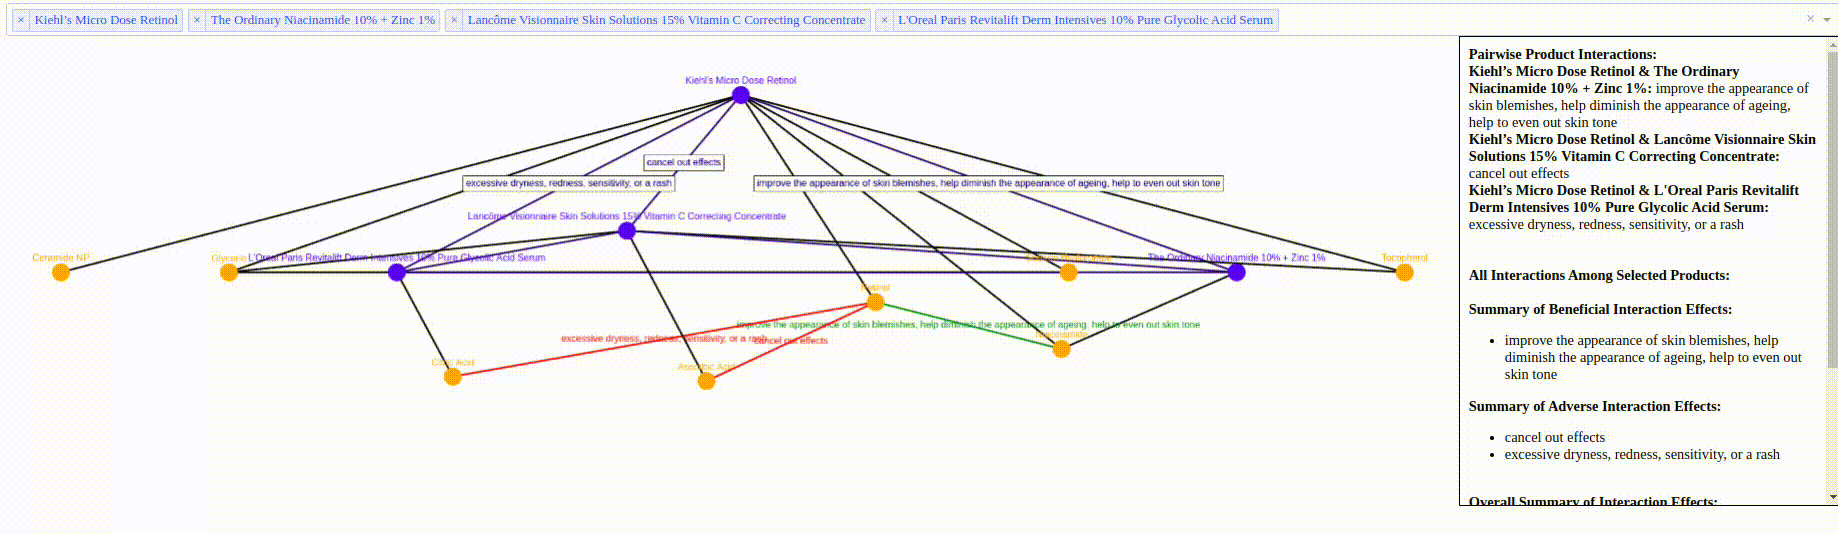


In [129]:
# Can take multiple product inputs selected from dropdown list
# Product (BLUE) and Ingredient (ORANGE) nodes shown with names; 
# Beneficial (GREEN) and Adverse (RED) Interaction effects text BETWEEN INGREDIENTS displayed 
# Beneficial (GREEN) and Adverse (RED) Interaction effects edges BETWEEN INGREDIENTS displayed
# Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS displayed in NAVY 
#  --> with grey box outline around the text
# Text Box at the side which also shows 
#  - Consolidation of Beneficial and Adverse Interaction effects text BETWEEN PRODUCTS [PAIRWISE COMPARISON]
#  - Interaction effects among the selected products
#     - Beneficial
#     - Adverse
#     - Overall

#  --> For easier reading in case the knowledge graph is too messy

def generate_elements(product_names):
    G = nx.Graph()
    product_effects = {}

    # Add nodes for products and ingredients of selected products
    selected_ingredients = set()
    for product_name in product_names:
        G.add_node(product_name, type='product')
        product_data = df[df['Name'] == product_name]
        if not product_data.empty:
            ingredients = product_data.iloc[0]['Active Ingredients']
            selected_ingredients.update(ingredients)
            for ingredient in ingredients:
                G.add_node(ingredient, type='ingredient')
                G.add_edge(product_name, ingredient, relation='contains')

    # Add interactions only between selected ingredients
    combined_effects = []
    for ing1 in selected_ingredients:
        for ing2 in selected_ingredients:
            if ing1 != ing2 and (ing1, ing2) in all_combis:
                relation = 'beneficial' if (ing1, ing2) in beneficial_combis else 'adverse'
                label = all_combis.get((ing1, ing2), '')
                G.add_edge(ing1, ing2, label=label, relation=relation)
                combined_effects.append(f"{relation.capitalize()} Effect: {label}")

    # # Add edge between products with combined effects
    # if len(product_names) == 2:
    #     G.add_edge(product_names[0], product_names[1], label='; '.join(combined_effects), relation='product_interaction')


    # Add edges between all pairs of selected products with combined effects
    for product1, product2 in itertools.combinations(product_names, 2):
        effects = []
        for ing1 in df.loc[df['Name'] == product1, 'Active Ingredients'].values[0]:
            for ing2 in df.loc[df['Name'] == product2, 'Active Ingredients'].values[0]:
                if (ing1, ing2) in all_combis:
                    effects.append(all_combis[(ing1, ing2)])
        product_effects[(product1, product2)] = effects
        G.add_edge(product1, product2, label='; '.join(effects), relation='product_interaction')
    
        
    elements = []
    for node, data in G.nodes(data=True):
        node_class = 'product' if data['type'] == 'product' else 'ingredient'
        elements.append({'data': {'id': node, 'label': node}, 'classes': node_class})

    for source, target, data in G.edges(data=True):
        edge_class = data['relation']
        elements.append({'data': {'source': source, 'target': target, 'label': data.get('label', '')}, 'classes': edge_class})

    return elements, product_effects


app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='product-dropdown',
        options=[{'label': name, 'value': name} for name in df['Name']],
        value=['Product A'],
        multi=True  # Enable multiple selection
    ),
    html.Div([
        cyto.Cytoscape(
            id='cytoscape',
            elements=generate_elements(['Product A'])[0],
            style={'width': '80%', 'height': '500px', 'display': 'inline-block'},
            layout={'name': 'breadthfirst'},
            stylesheet=[
            {'selector': '.product', 'style': {'background-color': 'blue', 'color': 'blue', 'label': 'data(label)'}},
            {'selector': '.ingredient', 'style': {'background-color': 'orange', 'color': 'orange', 'label': 'data(label)'}},
            {'selector': '.contains', 'style': {'line-color': 'black'}},
            {'selector': '.beneficial', 'style': {'line-color': 'green', 'color': 'green', 'label': 'data(label)'}},
            {'selector': '.adverse', 'style': {'line-color': 'red', 'color': 'red', 'label': 'data(label)'}},
            {'selector': '.product_interaction', 'style': {'line-color': 'navy', 'color': 'navy', 'label': 'data(label)'}},
            {'selector': '.product_interaction',
                'style': {
                    'line-color': 'navy',
                    'color': 'navy',
                    'label': 'data(label)',
                    'text-background-color': 'white',
                    'text-background-opacity': 1,
                    'text-background-padding': 5,
                    'text-border-color': 'black',
                    'text-border-opacity': 1,
                    'text-border-width': 1
                }
            }
        ]
        ),
        html.Div(
            id='effect-box',
            style={'width': '20%', 'height': '500px', 'display': 'inline-block', 'vertical-align': 'top', 'border': '1px solid black', 'padding': '10px', 'overflow-y': 'scroll'}
        )
    ], style={'display': 'flex'})
])

@app.callback(
    [Output('cytoscape', 'elements'), Output('effect-box', 'children')],
    [Input('product-dropdown', 'value')]
)
def update_graph(selected_products):
    if not selected_products:
        # Return empty values if no products are selected
        return [], html.Div('No products selected.')
    
    try: 
        elements, product_effects = generate_elements(selected_products)

        # Initialize sets for beneficial and adverse effects
        beneficial_effects = set()
        adverse_effects = set()

        # Pairwise comparison components
        pairwise_comparison_components = []
        for (product1, product2), effects in product_effects.items():
            if effects:
                pairwise_comparison_components.append(
                    html.Div([
                        html.Strong(f'{product1} & {product2}: '),
                        html.Span('; '.join(effects))
                    ])
                )
                for effect in effects:
                    if effect in beneficial_combis.values():
                        beneficial_effects.add(effect)
                    elif effect in adverse_combis.values():
                        adverse_effects.add(effect)

        # Create components for the overall summary, beneficial, and adverse effects
        overall_summary_components = [html.Li(effect) for effect in beneficial_effects.union(adverse_effects)]
        beneficial_summary_components = [html.Li(effect) for effect in beneficial_effects] if beneficial_effects else html.Div('No beneficial effects.')
        adverse_summary_components = [html.Li(effect) for effect in adverse_effects] if adverse_effects else html.Div('No adverse effects.')

        # Combine all components in the text box
        effects_text_layout = [
            html.Div('Pairwise Product Interactions:', style={'fontWeight': 'bold'}),
            html.Div(pairwise_comparison_components) if pairwise_comparison_components else html.Div('No pairwise interactions.'),
            html.Br(),
            html.Br(),
            html.Div('All Interactions Among Selected Products:', style={'fontWeight': 'bold'}),
            html.Br(),
            html.Div('Summary of Beneficial Interaction Effects:', style={'fontWeight': 'bold'}),
            html.Ul(beneficial_summary_components),
            html.Div('Summary of Adverse Interaction Effects:', style={'fontWeight': 'bold'}),
            html.Ul(adverse_summary_components),
            html.Br(),
            html.Div('Overall Summary of Interaction Effects:', style={'fontWeight': 'bold'}),
            html.Ul(overall_summary_components),
            html.Br(),
            html.Div("Note: interaction effects between ingredients are not listed here, only displayed in the knowledge graph)")
        ]

        return elements, effects_text_layout

    except Exception as e:
        # Handle exceptions and return a message
        return [], html.Div(f'An error occurred: {str(e)}')
if __name__ == '__main__':
    app.run_server(debug=True)
